## Data Analysis

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import os

In [2]:
salesdata_list = os.listdir('.\Sales_Data')

all_sales_data = pd.DataFrame()

for file in salesdata_list:
    df_sales = pd.read_csv('./Sales_Data/'+ file)
    all_sales_data = pd.concat([all_sales_data,df_sales])

In [3]:
df_sales = all_sales_data
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning Data

###### Dropping NAN

In [4]:
nan_sales = df_sales[df_sales.isna().any(axis=1)]
nan_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_sales = df_sales.dropna(how='all').reset_index(drop=True)
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Removing Additional Rows

In [6]:
df_sales.drop(df_sales.index[df_sales['Order ID'] == 'Order ID'],inplace=True)

###### Converting into Numeric

In [7]:
df_sales['Quantity Ordered'] = pd.to_numeric(df_sales['Quantity Ordered'])

In [8]:
df_sales['Price Each'] = pd.to_numeric(df_sales['Price Each'])

##### Adding Columns for Analysis

In [9]:
df_sales['Sales'] = df_sales['Quantity Ordered']*df_sales['Price Each'] 

In [10]:
# df_sales['Month_test'] = df_sales['Order Date'].dt.month
# df_sales['month'] = pd.DatetimeIndex(df_sales['Order Date']).month

In [13]:
# df_sales['month']
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'],format = 'mixed')
df_sales['Month'] = (df_sales['Order Date']).dt.strftime('%b')

In [16]:
print(df_sales.columns)
df_sales.head()

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Sales', 'Month'],
      dtype='object')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Apr
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Apr
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Apr
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Apr
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Apr


In [19]:
## adding 'CITY' column , 

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

# df_sales['City']  = df_sales['Purchase Address'].apply(lambda x : x.split(',')[1])
df_sales['City']  = df_sales['Purchase Address'].apply(lambda x : (f"{get_city(x)}({get_state(x)})"))

In [20]:
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Apr,Dallas(TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Apr,Boston(MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Apr,Los Angeles(CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Apr,Los Angeles(CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Apr,Los Angeles(CA)


#### 1. What was the best month for sales ? How much was earned this month ?

In [21]:
results_sales = df_sales[['Quantity Ordered', 'Price Each','Sales', 'Month']].groupby('Month',as_index=False).sum()

In [22]:
results_sales[['Month','Quantity Ordered']]

,Month,Quantity Ordered
0,Apr,20558
1,Aug,13448
2,Dec,28114
3,Feb,13449
4,Jan,10903
5,Jul,16072
6,Jun,15253
7,Mar,17005
8,May,18667
9,Nov,19798


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\deeks\AppData\Local\Temp\ipykernel_14488\499698814.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


<function matplotlib.pyplot.show(close=None, block=None)>

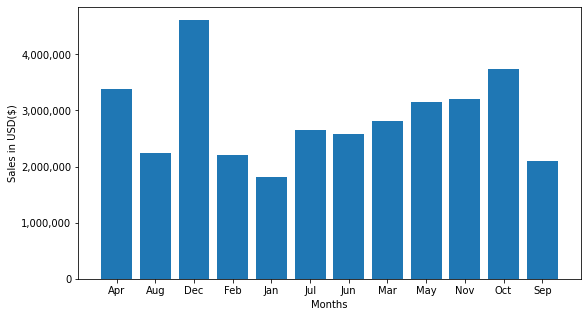

In [24]:
plt.figure(figsize=(9,5))
plt.bar(data = results_sales,height= 'Sales',x = 'Month')
plt.ylabel('Sales in USD($)')
plt.xlabel('Months')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show

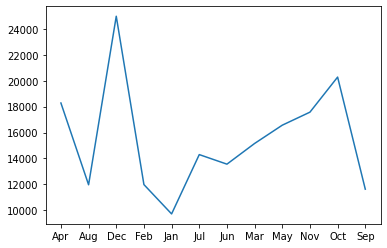

In [25]:
plt.plot(df_sales['Month'].value_counts().sort_index())

#### 2. Which city has the highest Sales ?

In [26]:
df_sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Sales', 'Month', 'City'],
      dtype='object')

In [27]:
city_sales = df_sales[['City','Quantity Ordered', 'Price Each','Sales']].groupby('City').sum().reset_index(drop=False)

C:\Users\deeks\AppData\Local\Temp\ipykernel_14488\141354044.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


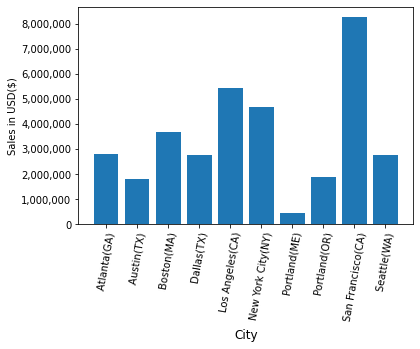

In [33]:
plt.bar(data = city_sales,x = 'City',height = 'Sales' )
plt.xlabel('City',size=12)
plt.xticks(rotation=80,size = 10)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.ylabel('Sales in USD($)')
plt.show()

#### 3. What time should we display advertisements to maximize likelyhood of customer's buying products ?

In [67]:
df_sales['Order Time'] = df_sales['Order Date'].dt.hour

In [68]:
# df_sales['Order Time'] = df_sales['Order Date'].dt.time
# df_sales['Order Time Slot'] = df_sales['Order Time'].apply(lambda x : x.hour if x.hour <= 4 else x.hour+1)

In [69]:
hours = [hour for hour,df in df_sales.groupby('Order Time')]

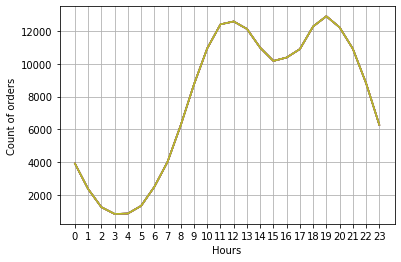

In [89]:
plt.plot(hours,df_sales.groupby(['Order Time']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Count of orders')
plt.grid()
plt.show()

#### 4.  What products are most often sold together ?

In [146]:
df_new_sales = df_sales.drop_duplicates(keep='first')

In [147]:
df_new_sales = df_new_sales[df_new_sales['Order ID'].duplicated(keep=False)]

In [148]:
df_new_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Order Time
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Apr,Los Angeles(CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Apr,Los Angeles(CA),14
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,Apr,Los Angeles(CA),19
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,Apr,Los Angeles(CA),19
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",5.98,Apr,San Francisco(CA),17


In [149]:
df_new_sales['Grouped'] = df_new_sales.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

In [150]:
df_new_sales.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Order Time,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Apr,Los Angeles(CA),14,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Apr,Los Angeles(CA),14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,Apr,Los Angeles(CA),19,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,Apr,Los Angeles(CA),19,"Google Phone,USB-C Charging Cable"
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",5.98,Apr,San Francisco(CA),17,"AAA Batteries (4-pack),Google Phone"
32,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",600.00,Apr,San Francisco(CA),17,"AAA Batteries (4-pack),Google Phone"
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",14.95,Apr,New York City(NY),11,"Lightning Charging Cable,USB-C Charging Cable"
119,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",11.95,Apr,New York City(NY),11,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,Apple Airpods Headphones,1,150.00,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",150.00,Apr,Seattle(WA),10,"Apple Airpods Headphones,ThinkPad Laptop"
129,176681,ThinkPad Laptop,1,999.99,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",999.99,Apr,Seattle(WA),10,"Apple Airpods Headphones,ThinkPad Laptop"


In [154]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_new_sales['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 2127
('Google Phone', 'USB-C Charging Cable') 2106
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 943
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 446
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


#### What product is sold most and why do you think it's sold the most ?

In [341]:
df_sales_product = df_sales.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values('Product')

In [342]:
df_sales_product

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


C:\Users\deeks\AppData\Local\Temp\ipykernel_14488\2106361439.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


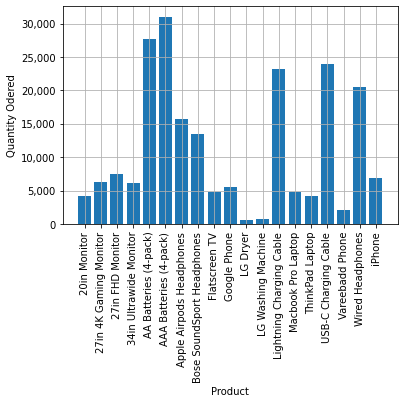

In [343]:
plt.bar(data = df_sales_product,x = 'Product',height = 'Quantity Ordered')
plt.xlabel('Product')
plt.xticks(rotation=90,size = 10)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.grid()
plt.ylabel('Quantity Odered')
plt.show()

In [345]:
prices = df_sales.groupby('Product')['Price Each'].mean().reset_index().sort_values('Price Each').sort_values('Product')

In [346]:
prices

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


C:\Users\deeks\AppData\Local\Temp\ipykernel_14488\3166361153.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels = df_sales_product['Product'],rotation = 'vertical')


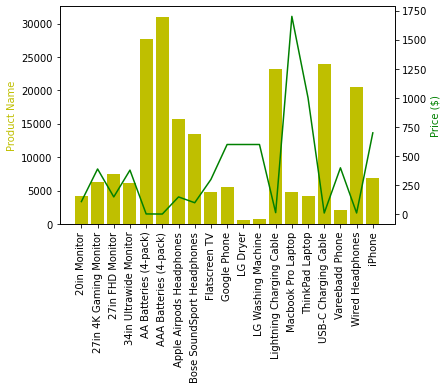

In [349]:
fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(data = df_sales_product,x = 'Product',height = 'Quantity Ordered',color = 'y')
ax2.plot(df_sales_product['Product'],prices['Price Each'],color = 'g')

ax1.set_ylabel('Product Name',color = 'y')
ax2.set_ylabel('Price ($)', color = 'g')

ax1.set_xticklabels(labels = df_sales_product['Product'],rotation = 'vertical')


plt.show()
